## Conclusions and Visualizations

In this notebook we make conclusions from the numerical results of the experiments. We will also make some visualizations to help us understand the results better.

Contents:

- plot 1: x: min gain - max gain, y: fraction of pairs with gain smaller than x

- plot 2: average variance over all pairs over time

- average cycle length
 
- plot 3

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

import scienceplots

plt.style.use(["science", "nature", "grid", "no-latex"])



In [3]:
def extend_to_length(arr, target_length=200):
    repeats = (target_length + len(arr) - 1) // len(arr)  # number of times to repeat
    extended = (arr * repeats)[:target_length]
    return extended

In [4]:
assignment_file = "Barcelona_result_SO_OD_pairs.txt"
sym_file = "algorithm_results/Barcelonanew.out"
analytical_file = "analytical_results/barcelona.out"

In [5]:

with open(sym_file) as f:
    global data
    
    lines = f.readlines()

    # filter out pairs that were not simulated    
    data = [line for line in lines if not line.startswith("Not enough routes ")]

with open(analytical_file) as f:
    global analytical_data
    
    lines = f.readlines()

    # filter out pairs that were not simulated    
    analytical_data = [line for line in lines if not line.startswith("Not enough routes ")]

# create a pandas dataframe to store the data
data_dict = {}

# iterate over the lines - each od pair starts with a "Running simulation for" line
for i, line in enumerate(data):
    
    if not line.startswith("Running simulation for"):
        continue
        
    # get the origin and destination
    origin = line.split()[-2]
    destination = line.split()[-1]
    
    data_dict[(origin, destination)] = {}
    
    conv_line = data[i+1]
    data_dict[(origin, destination)]["convergence"] = -1
    if conv_line.startswith("Converged in"):
        # get the number of iterations
        data_dict[(origin, destination)]["convergence"] = int(conv_line.split()[-2])

    diff_line = data[i+2]
    data_dict[(origin, destination)]["difference"] = float(diff_line.split()[-2])
    data_dict[((origin, destination))]["UE_time"] = float(diff_line.split()[-1])
    
    mean_line = data[i+3]
    # array of mean values (floats)
    match = re.findall(r"[-+]?\d*\.\d+(?:[eE][-+]?\d+)?|[-+]?\d+(?:[eE][-+]?\d+)?", mean_line)

    
    if match:
        data_dict[(origin, destination)]["mean"] = [float(x) for x in match]
    else:
        data_dict[(origin, destination)]["mean"] = []
                
    variance_line = data[i+4]
    # array of variance values (floats)
    match = re.findall(r"[-+]?\d*\.\d+(?:[eE][-+]?\d+)?|[-+]?\d+(?:[eE][-+]?\d+)?", variance_line)

    
    if match:
        data_dict[(origin, destination)]["variance"] = [float(x) for x in match]
    else:
        data_dict[(origin, destination)]["variance"] = []
        
    hist_line = data[i+5]
    # array of arrays of integers
    match = re.search(r"\[\[([0-9.,\s\[\]]+)\]\]", hist_line)
    
    if match:
        data_dict[(origin, destination)]["history"] = [list(map(int, x.split(",")) ) for x in match.group(1).split("], [")]
    else:
        data_dict[(origin, destination)]["history"] = []
    
    # get number of agents
    agents_line = data[i+6]
    data_dict[(origin, destination)]["agents"] = round(float(agents_line.split()[-1]))

    # get inequity
    inequity_line = data[i+7]
    
    match =re.findall(r"[-+]?\d*\.\d+(?:[eE][-+]?\d+)?|[-+]?\d+(?:[eE][-+]?\d+)?", inequity_line)
    
    if match:
        data_dict[(origin, destination)]["inequity"] = [float(x) for x in match]
    else:
        data_dict[(origin, destination)]["inequity"] = []
        
    # get almost convergence
    almost_conv_line = data[i+8]

    # match that finds the array of integers, separated by commas and possibly negative
    match = re.search(r"\[([0-9,\s-]+)\]", almost_conv_line)
    
    if match:
        data_dict[(origin, destination)]["almost_convergence"] = list(map(int, match.group(1).split(",")))
    else:
        data_dict[(origin, destination)]["almost_convergence"] = []
        
    # get the standarized inequity
    
    standarized_inequity_line = data[i+9]
    
    match =re.findall(r"[-+]?\d*\.\d+(?:[eE][-+]?\d+)?|[-+]?\d+(?:[eE][-+]?\d+)?", standarized_inequity_line)
    
    if match:
        data_dict[(origin, destination)]["inequity_norm"] = [float(x) for x in match]
    else:
        data_dict[(origin, destination)]["inequity_norm"] = []
        
    data_dict[(origin, destination)]["min_inequity"] = min(data_dict[(origin, destination)]["inequity_norm"])
        
    data_dict[(origin, destination)]["min_inequity_at_5"] = min(data_dict[(origin, destination)]["inequity_norm"][:5])
    
    data_dict[(origin, destination)]["min_inequity_at_10"] = min(data_dict[(origin, destination)]["inequity_norm"][:10])
    
    data_dict[(origin, destination)]["min_inequity_at_20"] = min(data_dict[(origin, destination)]["inequity_norm"][:20])
# add the analytical data

for i, line in enumerate(analytical_data):
    if not line.startswith("OD pair"):
        continue
    origin, destination = line.split()[-1].split("-")
    
    next_line = analytical_data[i+1]
    data_dict[(origin, destination)]["analytical"] = int(next_line.split()[-1])
    
    next_line = analytical_data[i+2]
    data_dict[(origin, destination)]["gcd_analytical"] = int(next_line.split()[-1])

    next_line = analytical_data[i+3]

    match =re.findall(r"[-+]?\d*\.\d+(?:[eE][-+]?\d+)?|[-+]?\d+(?:[eE][-+]?\d+)?", next_line)

    if match:
        data_dict[(origin, destination)]["analytical_inequity"] = extend_to_length([float(x) for x in match])
    else:
        data_dict[(origin, destination)]["analytical_inequity"] = []

    next_line = analytical_data[i+4]
    match =re.findall(r"[-+]?\d*\.\d+(?:[eE][-+]?\d+)?|[-+]?\d+(?:[eE][-+]?\d+)?", next_line)

    if match:
        data_dict[(origin, destination)]["analytical_inequity_norm"] = extend_to_length([float(x) for x in match])
    else:
        data_dict[(origin, destination)]["analytical_inequity_norm"] = []
    

In [6]:
# use the data_dict to create a pandas dataframe
df = pd.DataFrame(data_dict).T
# add a column for the OD pair
df["OD"] = df.index
df["OD"] = df["OD"].apply(lambda x: " -> ".join(x))

In [7]:
# basic statistics
# number of converged pairs
print(f"Number of pairs: {len(df)}")
converged = df[df["convergence"] != -1]
not_converged = df[df["convergence"] == -1]
print(f"Converged: {len(converged)}")
print(f"Not converged: {len(not_converged)}")


Number of pairs: 2078
Converged: 1361
Not converged: 717


In [8]:
# print columns of the dataframe
print("Columns:")
print(df.columns.tolist())

Columns:
['convergence', 'difference', 'UE_time', 'mean', 'variance', 'history', 'agents', 'inequity', 'almost_convergence', 'inequity_norm', 'min_inequity', 'min_inequity_at_5', 'min_inequity_at_10', 'min_inequity_at_20', 'analytical', 'gcd_analytical', 'analytical_inequity', 'analytical_inequity_norm', 'OD']


In [9]:
# number of cases where convergence is equal to analytical
print("Convergence equal to analytical: ", len(df[df["convergence"] == df["analytical"]]))
# number of cases where convergence is equal to gcd analytical and smaller than analytical
print("Convergence equal to gcd analytical while opting works: ", (len(df[df["convergence"] == df["gcd_analytical"]] )) - len(df[df["convergence"] == df["analytical"]]))
# number of cases where convergence is less than gcd analytical
print("Convergence less than gcd analytical: ", (len(df[df["convergence"] < df["gcd_analytical"]]) - len(df[df["convergence"] == -1])))
# number of cases where convergence is greater than analytical
print("Convergence greater than analytical: ", len(df[df["convergence"] > df["analytical"]]))

# reshape almost convergence to multiple columns
almost_conv_params = df["almost_convergence"].apply(len).max()
for i in range(almost_conv_params):
    df["almost_convergence_" + str(i)] = df["almost_convergence"].apply(lambda x: x[i] if i < len(x) else np.nan)
    
for i in range(almost_conv_params):
    print("Convergence greater than almost convergence "+ str(i) + ": " , len(df[df["convergence"] > df["almost_convergence_" + str(i)] ]))

Convergence equal to analytical:  792
Convergence equal to gcd analytical while opting works:  564
Convergence less than gcd analytical:  5
Convergence greater than analytical:  0
Convergence greater than almost convergence 0:  387
Convergence greater than almost convergence 1:  231
Convergence greater than almost convergence 2:  94


In [10]:
# stats for the analytical data
# mean, max, 95th percentile, 99th percentile of the analytical data
print("Max analytical: ", df["analytical"].max())
print("Mean analytical: ", df["analytical"].mean())
print("Median analytical: ", df["analytical"].median())
print("75th percentile analytical: ", df["analytical"].quantile(0.75))
print("95th percentile analytical: ", df["analytical"].quantile(0.95))
print("std analytical: ", df["analytical"].std())
# mean, max, 95th percentile, 99th percentile of the gcd analytical data
print("Max gcd analytical: ", df["gcd_analytical"].max())
print("Mean gcd analytical: ", df["gcd_analytical"].mean())
print("Median gcd analytical: ", df["gcd_analytical"].median())
print("75th percentile gcd analytical: ", df["gcd_analytical"].quantile(0.75))
print("95th percentile gcd analytical: ", df["gcd_analytical"].quantile(0.95))
print("std gcd analytical: ", df["gcd_analytical"].std())



# % of cycles shorter than 5, 10, 20 days
print("Percentage of cycles shorter than 5 days: ", len(df[df["analytical"] <= 5])/len(df))
print("Percentage of cycles shorter than 10 days: ", len(df[df["analytical"] <= 10])/len(df))
print("Percentage of cycles shorter than 20 days: ", len(df[df["analytical"] <= 20])/len(df))
# for gcd analytical
print("Percentage of cycles shorter than 5 days (gcd analytical): ", len(df[df["gcd_analytical"] <= 5])/len(df))
print("Percentage of cycles shorter than 10 days (gcd analytical): ", len(df[df["gcd_analytical"] <= 10])/len(df))
print("Percentage of cycles shorter than 20 days (gcd analytical): ", len(df[df["gcd_analytical"] <= 20])/len(df))
      


Max analytical:  777
Mean analytical:  31.37487969201155
Median analytical:  16.0
75th percentile analytical:  34.0
95th percentile analytical:  100.29999999999973
std analytical:  52.064082993450754
Max gcd analytical:  777
Mean gcd analytical:  25.944177093359
Median gcd analytical:  11.0
75th percentile gcd analytical:  28.0
95th percentile gcd analytical:  91.0
std gcd analytical:  47.80592649315018
Percentage of cycles shorter than 5 days:  0.1424446583253128
Percentage of cycles shorter than 10 days:  0.35129932627526467
Percentage of cycles shorter than 20 days:  0.5923965351299326
Percentage of cycles shorter than 5 days (gcd analytical):  0.2776708373435996
Percentage of cycles shorter than 10 days (gcd analytical):  0.46631376323387874
Percentage of cycles shorter than 20 days (gcd analytical):  0.6746871992300288


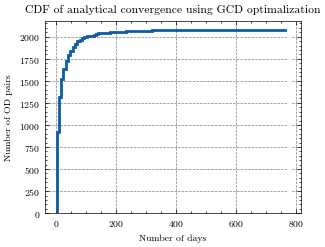

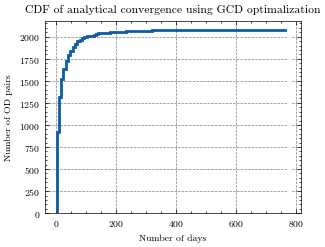

In [11]:
#cdf of the analytical convergence 
plt.figure()
# plt.hist(df["analytical"], bins=100, cumulative=True, histtype='step', label='Analytical', linewidth=2)
plt.hist(df["gcd_analytical"], bins=100, cumulative=True, histtype='step', label='GCD analytical', linewidth=2)
plt.title("CDF of analytical convergence using GCD optimalization")
plt.xlabel("Number of days")
plt.ylabel("Number of OD pairs")
last_bin = df["analytical"].max()
plt.axvline(x=last_bin, color='white', linewidth=3)
# get rid of the last tick
plt.show()

#change it to be more appealing
plt.figure()
plt.hist(df["gcd_analytical"], bins=100, cumulative=True, histtype='step', label='GCD analytical', linewidth=2)
plt.title("CDF of analytical convergence using GCD optimalization")
plt.xlabel("Number of days")
plt.ylabel("Number of OD pairs")
plt.axvline(x=last_bin, color='white', linewidth=3)


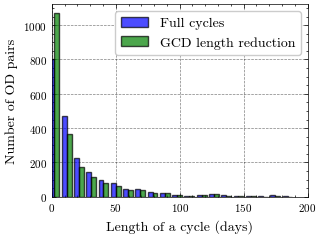

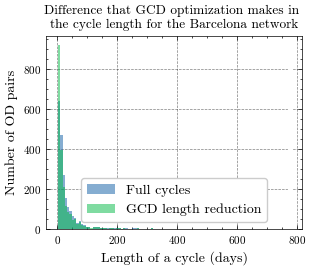

ValueError: x and y must have same first dimension, but have shapes (2077,) and (2051,)

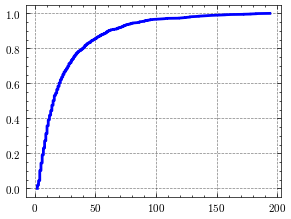

In [ ]:
#distribution of the analytical convergence compared to the gcd
plt.figure()
#increase the font size of the labels
plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'axes.labelsize': 10, 'legend.fontsize': 10, 'xtick.labelsize': 8, 'ytick.labelsize': 8})
#increase the font size of the axis and legend
dftmp = df.copy()

# Prepare data
data1 = dftmp["analytical"][dftmp['analytical'] < 200]
data2 = dftmp["gcd_analytical"][dftmp['gcd_analytical'] < 200]

# Define bins
bins = np.histogram_bin_edges(np.concatenate([data1, data2]), bins=20)
counts1, _ = np.histogram(data1, bins)
counts2, _ = np.histogram(data2, bins)
width = (bins[1] - bins[0]) * 0.4

# Left bars: Full cycles
plt.bar(bins[:-1] - width/2, counts1, width=width, alpha=0.7, label='Full cycles', color='blue', edgecolor='black')
# Right bars: GCD length reduction
plt.bar(bins[:-1] + width/2, counts2, width=width, alpha=0.7, label='GCD length reduction', color='green', edgecolor='black')

# plt.title("Difference that GCD optimization makes in \nthe cycle length for the Barcelona network")
plt.xlabel("Length of a cycle (days)")
plt.ylabel("Number of OD pairs")
plt.legend()
plt.xlim(0, 200)
plt.axvline(x=last_bin, color='white', linewidth=3)
#save transparent   
plt.savefig("analytical_vs_gcd_analytical_all_pairs.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

plt.rcParams.update({'axes.labelsize': 10, 'legend.fontsize': 10, 'xtick.labelsize': 8, 'ytick.labelsize': 8})
plt.hist(df["analytical"], bins=100, alpha=0.5, label='Full cycles',  linewidth=2)
plt.hist(df["gcd_analytical"], bins=100, alpha=0.5, label='GCD length reduction',  linewidth=2)
plt.title("Difference that GCD optimization makes in \nthe cycle length for the Barcelona network")
plt.xlabel("Length of a cycle (days)")
plt.ylabel("Number of OD pairs")
plt.legend()
# plt.xlim(0, 200)
plt.axvline(x=last_bin, color='white', linewidth=3)
#save transparent   
plt.savefig("analytical_vs_gcd_analytical_full.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()



# Plot

data1 = dftmp["analytical"][dftmp["analytical"] < 200].sort_values().to_numpy()
data2 = dftmp["convergence"][dftmp["convergence"] < 200].sort_values().to_numpy()

#CDF of the two distributions using data1 and data2
cdf1 = np.arange(1, len(data1)+1) / len(data1)
cdf2 = np.arange(1, len(data2)+1) / len(data2)
plt.figure()
plt.plot(data1, cdf1, label="Full Cycles", color="blue", linewidth=2)
plt.plot(data2, cdf2, label="GCD length reduction", color="orange", linewidth=2)

plt.xlabel("Length of the cycle (days)")
plt.ylabel("Cumulative fraction of OD pairs")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("cdf_analytical_vs_heuristic.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Print coverage info
print("Percentage of cases included in CDF plot:", dftmp["analytical"][dftmp["analytical"] < 200].size / df["analytical"].size)


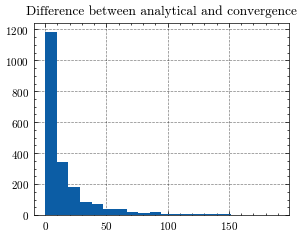

In [13]:
# plot results above as a difference histogram
conv_diff = df["analytical"] - df["convergence"]
# limit x to 200
conv_diff = conv_diff[conv_diff < 200]
plt.hist(conv_diff, bins=20)
plt.title("Difference between analytical and convergence")
plt.show()


In [14]:
# count pairs that have convergence greater than 200 days   
print("Number of pairs with convergence greater than 200 days: ", len(df[df["analytical"] > 200]))


Number of pairs with convergence greater than 200 days:  35


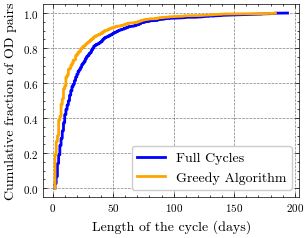

Percentage of cases included in CDF plot: 0.6515880654475458


In [43]:
# Filter out non-converged data
dftmp = df[df["convergence"] != -1]

# Prepare data (cutoff at 200)
data1 = dftmp["analytical"][dftmp["analytical"] < 200].sort_values().to_numpy()
data2 = dftmp["convergence"][dftmp["convergence"] < 200].sort_values().to_numpy()

# Compute CDF values
cdf1 = np.arange(1, len(data1)+1) / len(data1)
cdf2 = np.arange(1, len(data2)+1) / len(data2)

# Plot
plt.figure()
plt.plot(data1, cdf1, label="Full Cycles", color="blue", linewidth=2)
plt.plot(data2, cdf2, label="Greedy Algorithm", color="orange", linewidth=2)

plt.xlabel("Length of the cycle (days)")
plt.ylabel("Cumulative fraction of OD pairs")
plt.legend(loc="lower right")
# plt.title("CDF: Full Cycles vs. Greedy Algorithm")
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("cdf_analytical_vs_heuristic.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Print coverage info
print("Percentage of cases included in CDF plot:", dftmp["analytical"][dftmp["analytical"] < 200].size / df["analytical"].size)


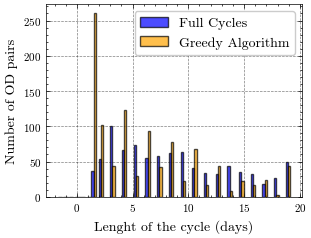

percentage of cases that are inclued in a plot above:  0.6515880654475458


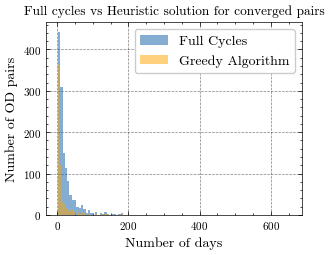

In [ ]:
# heuristic vs analytical approach
# histogram
dftmp = df[df["convergence"] != -1]

# Prepare data
data1 = dftmp["analytical"][dftmp["analytical"] < 200]
data2 = dftmp["convergence"][dftmp["convergence"] < 200]
# bins = np.histogram_bin_edges(np.concatenate([data1, data2]), bins=20)

# Compute histograms
counts1, _ = np.histogram(data1, bins)
counts2, _ = np.histogram(data2, bins)

# Bar width adjustment
width = (bins[1] - bins[0]) * 0.4


plt.figure()
plt.bar(bins[:-1] - width/2, counts1, width=width, alpha=0.7, label="Full Cycles", color="blue", edgecolor='black')
plt.bar(bins[:-1] + width/2, counts2, width=width, alpha=0.7, label="Greedy Algorithm", color="orange", edgecolor='black')

plt.legend(loc="upper right")
# plt.title("Full cycles vs Heuristic solution for converged pairs")
plt.xlabel("Lenght of the cycle (days)")
plt.ylabel("Number of OD pairs")
plt.savefig("analytical_vs_heuristic.png", dpi=300, bbox_inches='tight', transparent=True)

plt.show()
print("percentage of cases that are inclued in a plot above: ", dftmp["analytical"][dftmp["analytical"] < 200].size / df["analytical"].size)

# plot without cutting the data
plt.figure()
plt.hist(df["analytical"][df["convergence"] != -1], bins=100, alpha=0.5, label="Full Cycles")
# change the color of the second histogram
plt.hist(df["convergence"][df["convergence"] != -1], bins=100, alpha=0.5, label="Greedy Algorithm", color="orange")
plt.legend(loc="upper right")
plt.title("Full cycles vs Heuristic solution for converged pairs")
plt.xlabel("Number of days")
plt.ylabel("Number of OD pairs")
plt.savefig("analytical_vs_heuristic_full.png", dpi=300, bbox_inches='tight', transparent=True)

plt.show()

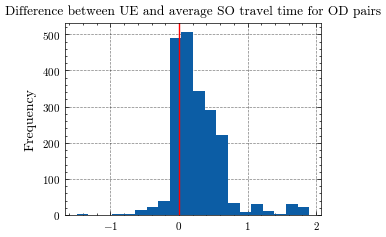

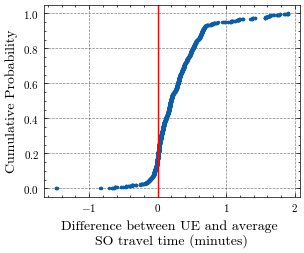

In [36]:
# create plots

# sort the df by the difference
df = df.sort_values(by="difference")

# create a histogram of the difference
plt.figure()
df["difference"].plot(kind="hist", bins=20)
# add line at 0
plt.axvline(x=0, color="red")
plt.title("Difference between UE and average SO travel time for OD pairs")
plt.show()
# mke it cdf plot

# Extract the data from the 'difference' column
sorted = df["difference"].sort_values()

# Calculate the cumulative distribution
cdf = np.arange(1, len(sorted) + 1) / len(sorted)

# Plot the CDF
plt.figure()
plt.plot(sorted, cdf, marker=".", linestyle="none")
plt.axvline(x=0, color="red")
# add units - x axis is in minutes
plt.xlabel("Difference between UE and average \nSO travel time (minutes)")
# plt.title("CDF of Difference between UE \nand average SO travel time for OD pairs")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.savefig("cdf_difference.png", dpi=300, bbox_inches='tight', transparent=True)

In [17]:
# print percentage of negative differences
print("Percentage of OD pairs with negative differences: ", (df["difference"] < 0).sum() / len(df) * 100, "%")
print("Percentage of OD pairs with positive differences: ", (df["difference"] > 0).sum() / len(df) * 100, "%")

Percentage of OD pairs with negative differences:  17.420596727622716 %
Percentage of OD pairs with positive differences:  82.53128007699712 %


In [18]:
# print 5 pairs with the highest difference
print("5 pairs with the highest difference: ")
print(df.head(5))


5 pairs with the highest difference: 
       convergence difference    UE_time  \
99 33            2      -1.49       13.4   
91 22            5     -1.486       17.2   
92 33           25  -1.462622  13.400978   
16 98            4  -0.843319  20.254181   
   102          -1  -0.823228  20.254272   

                                                     mean  \
99 33   [14.89, 29.78, 44.67, 59.56, 74.45, 89.34, 104...   
91 22   [18.686, 37.372, 56.05799999999999, 74.744, 93...   
92 33   [14.863599999999998, 29.727200000000003, 44.59...   
16 98   [21.0975, 42.195, 63.292500000000004, 84.39, 1...   
   102  [21.0775, 42.155, 63.232499999999995, 84.31, 1...   

                                                 variance  \
99 33   [0.04839999999999989, 0.0, 0.0483999999999995,...   
91 22   [0.04646399999999952, 0.03097599999999968, 0.0...   
92 33   [0.04770303999999989, 0.02044416000000012, 0.0...   
16 98   [0.005418750000000108, 0.007225000000000145, 0...   
   102  [0.00811875000000

In [19]:
df2 = df[df["convergence"] != -1].copy()
df3 = df[df["convergence"] == -1].copy()

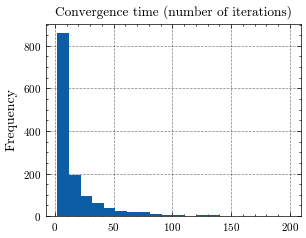

In [20]:
# lenght of the average cycle (convergence)
# filter out the pairs that did not converge
plt.figure()
df2["convergence"].plot(kind="hist", bins=20)
plt.title("Convergence time (number of iterations)")
plt.show()


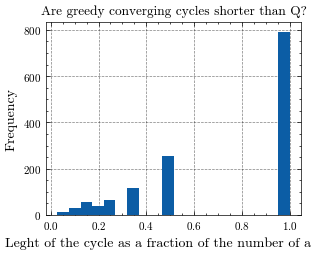

In [21]:
# convergence/agents
plt.figure()
(df2["convergence"] / df2["agents"]).plot(kind="hist", bins=20)
plt.title("Are greedy converging cycles shorter than Q?")
plt.xlabel("Leght of the cycle as a fraction of the number of agents")
plt.show()

# sort by this ratio and print head
df2["ratio"] = df2["convergence"] / df2["agents"]
df2 = df2.sort_values(by="ratio")
      

In [22]:
for id, element in df['analytical_inequity_norm'].items():
    if(type(element) is float):
        print(id, element)

In [23]:
# check length of arrays at df['analytical_inequity_norm'] and df['analytical_inequity']
print("Length of analytical_inequity_norm: ", df['analytical_inequity_norm'].apply(len).max())
print("Length of analytical_inequity: ", df['analytical_inequity'].apply(len).max())
# cut at 200
df['analytical_inequity_norm'] = df['analytical_inequity_norm'].apply(lambda x: x[:200])
df['analytical_inequity'] = df['analytical_inequity'].apply(lambda x: x[:200])

print("Length of analytical_inequity_norm after cut: ", df['analytical_inequity_norm'].apply(len).max())
print("Length of analytical_inequity after cut: ", df['analytical_inequity'].apply(len).max())
print("Length of analytical_inequity_norm after cut: ", df['analytical_inequity_norm'].apply(len).min())
print("Length of analytical_inequity after cut: ", df['analytical_inequity'].apply(len).min())


Length of analytical_inequity_norm:  200
Length of analytical_inequity:  200
Length of analytical_inequity_norm after cut:  200
Length of analytical_inequity after cut:  200
Length of analytical_inequity_norm after cut:  200
Length of analytical_inequity after cut:  200


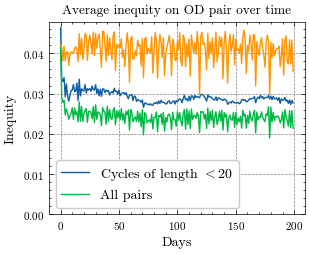

In [24]:
# plot average inequity for non-converging cycles with tolerance
avg_inequity = np.mean(df3['inequity'].to_list(), axis=0)
avg_inequity_all = np.mean(df['inequity'].to_list(), axis=0)
avg_analytical_inequity = np.mean(df['analytical_inequity'].to_list(), axis=0)
df4 = df[df["analytical"] > 20]
avg_inequity_analytical = np.mean(df4['inequity'].to_list(), axis=0)
plt.figure()
# plt.plot(avg_inequity)
plt.plot(avg_inequity_analytical)
plt.plot(avg_inequity_all)
plt.plot(avg_analytical_inequity)
plt.ylim(ymin=0)
plt.xlabel("Days")
plt.ylabel("Inequity")
plt.title("Average inequity on OD pair over time")
plt.legend(["Cycles of length $< 20$", "All pairs"])
plt.show()



In [25]:
# # pick 5 random pairs and plot their inequity
# # stop plotting each pair after it reaches minimum inequity

# # pick 5 random pairs
# df["min_ineq_up_to_t"] = df["inequity"].apply(lambda x: [min(x[:i+1]) for i in range(len(x))])
# for i in range(10):
#     random_pairs = df[df["convergence"] < 100].sample(5)

#     plt.figure()
#     for index, row in random_pairs.iterrows():
#         min_inequity = row["min_inequity"]
        
#         inequity = row["min_ineq_up_to_t"]
#         min_idx = np.argmin(inequity)
#         inequity = inequity[:min_idx+1]
#         plt.plot(inequity)
#     # print(random_pairs["OD"])
#     plt.xlabel("Days")
#     plt.ylabel("Min Inequity up to day t")
#     plt.plot()
    

/var/folders/w4/xs9m4t1j28598sp65xft3k1h0000gn/T/ipykernel_50876/3875002731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["min_inequity_norm"] = df4["inequity_norm"].apply(lambda x: [min(x[:i+1]) for i in range(len(x))])


<Figure size 330x250 with 0 Axes>

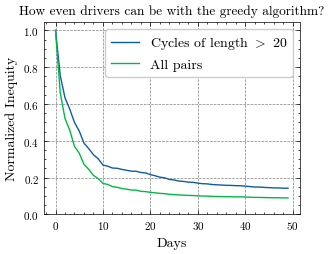

In [26]:
# for each day, calculate minimal inequity up to that day
df4["min_inequity_norm"] = df4["inequity_norm"].apply(lambda x: [min(x[:i+1]) for i in range(len(x))])

df["min_inequity_norm"] = df["inequity_norm"].apply(lambda x: [min(x[:i+1]) for i in range(len(x))])
plt.tight_layout()

plt.figure()
# plot only first 50 days
plt.plot(np.mean(df4["min_inequity_norm"].to_list(), axis=0)[:50])
plt.plot(np.mean(df["min_inequity_norm"].to_list(), axis=0)[:50])
plt.ylim(ymin=0)
plt.xlabel("Days")
plt.ylabel("Normalized Inequity")
plt.title("How even drivers can be with the greedy algorithm?") 
plt.legend(["Cycles of length $>$ 20", "All pairs"])
# CHANGEEEEE (inequity of best cycle shorter than t days)
# plt.rc('font', size=20)
# make the line thicker
plt.savefig('inequity.png', format='png', dpi=600, transparent=True, bbox_inches='tight')

from matplotlib.pyplot import savefig


In [27]:
df["diff_min_inequity_10-total"] = df["min_inequity_at_10"] - df["min_inequity"]
df["diff_min_inequity_5-total"] = df["min_inequity_at_5"] - df["min_inequity"]
df["diff_min_inequity_50-total"] = df["min_inequity_at_20"] - df["min_inequity"]
df["diff_inequity_min_starting"] = df["inequity_norm"].apply(lambda x: x[0] - min(x))

print("Difference in min inequity at 10 days and total min inequity: ", df["diff_min_inequity_10-total"].mean())
print("Difference in min inequity at 5 days and total min inequity: ", df["diff_min_inequity_5-total"].mean())
for alpha in [0.5,0.2,0.1,0.01,0.001]:
    print("Alpha: ", alpha)
    print("Number of cases where min inequity at 5 days is smaller than alpha: ", (df["min_inequity_at_5"] < alpha).sum())
    print("Number of cases where min inequity at 10 days is smaller than alpha: ", (df["min_inequity_at_10"] < alpha).sum())
    print("Number of cases where min inequity at 50 days is smaller than alpha: ", (df["min_inequity_at_20"] < alpha).sum())

Difference in min inequity at 10 days and total min inequity:  0.11582040551132272
Difference in min inequity at 5 days and total min inequity:  0.2908541623847653
Alpha:  0.5
Number of cases where min inequity at 5 days is smaller than alpha:  1526
Number of cases where min inequity at 10 days is smaller than alpha:  1893
Number of cases where min inequity at 50 days is smaller than alpha:  1983
Alpha:  0.2
Number of cases where min inequity at 5 days is smaller than alpha:  770
Number of cases where min inequity at 10 days is smaller than alpha:  1205
Number of cases where min inequity at 50 days is smaller than alpha:  1551
Alpha:  0.1
Number of cases where min inequity at 5 days is smaller than alpha:  614
Number of cases where min inequity at 10 days is smaller than alpha:  925
Number of cases where min inequity at 50 days is smaller than alpha:  1224
Alpha:  0.01
Number of cases where min inequity at 5 days is smaller than alpha:  547
Number of cases where min inequity at 10 days

/var/folders/w4/xs9m4t1j28598sp65xft3k1h0000gn/T/ipykernel_50876/4130530465.py:22: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  plt.plot(cdf[:20])


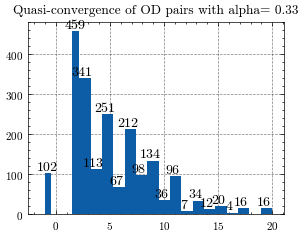

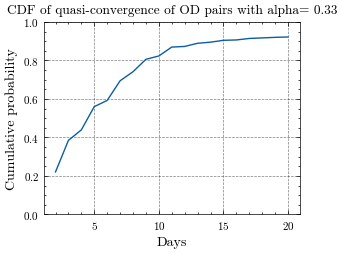

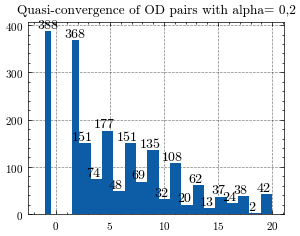

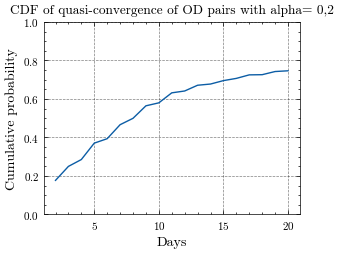

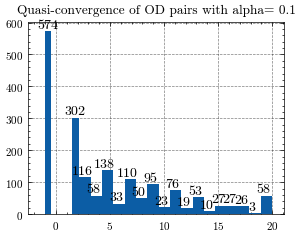

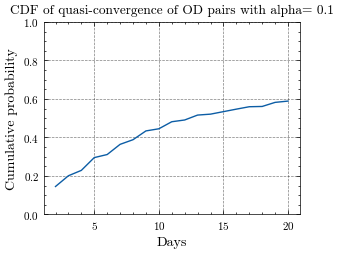

In [28]:
# analysis of almost convergence for non-converging cycles
param = ["0.33", "0,2", "0.1"]
for i in range(almost_conv_params): # for each almost convergence parameter
    # plot histogram of almost convergence
    data = df["almost_convergence_" + str(i)][df["almost_convergence_" + str(i)] <= 20]
    bin_edges = np.histogram_bin_edges(data, bins=20)
    bin_edges = np.unique(np.concatenate((bin_edges, [-1.5, -0.5, 0.5, 1.5])))
    
    plt.figure()
    plt.title("Quasi-convergence of OD pairs with alpha= " + param[i])
    counts, bins, patches = plt.hist(data, bins=bin_edges) # type: ignore
    for count, bin in zip(counts, bins):
        if count > 0:
            plt.text(bin + (bins[1] - bins[0]) / 2, count, str(int(count)), # type: ignore
                     ha='center', va='bottom', fontsize=10, color='black')
    # create a cdf with the same data
    data = df["almost_convergence_" + str(i)]
    data = data.apply(lambda x: x if x  > 0 else 1e5)
    plt.figure()
    cdf = np.cumsum(data.value_counts(normalize=True).sort_index())
    #plot first 20 values
    plt.plot(cdf[:20])
    plt.xlabel("Days")
    plt.ylabel("Cumulative probability")
    plt.ylim(0,1)
    # plt.xticks(np.arange(xmin, xmax, 3))
    plt.title("CDF of quasi-convergence of OD pairs with alpha= " + param[i])
    plt.show()
    

In [29]:
# stats analysis for greedy cycles
# max, mean, median, 75th percentile, 95th percentile, std of the min inequity
print("Max min inequity: ", df["min_inequity"].max())
print("Mean min inequity: ", df["min_inequity"].mean())
print("Median min inequity: ", df["min_inequity"].median())
print("75th percentile min inequity: ", df["min_inequity"].quantile(0.75))
print("95th percentile min inequity: ", df["min_inequity"].quantile(0.95))
print("std min inequity: ", df["min_inequity"].std())

# at 5 days
print("Max min inequity at 5 days: ", df["min_inequity_at_5"].max())
print("Mean min inequity at 5 days: ", df["min_inequity_at_5"].mean())
print("Median min inequity at 5 days: ", df["min_inequity_at_5"].median())
print("75th percentile min inequity at 5 days: ", df["min_inequity_at_5"].quantile(0.75))
print("95th percentile min inequity at 5 days: ", df["min_inequity_at_5"].quantile(0.95))
print("std min inequity at 5 days: ", df["min_inequity_at_5"].std())

# at 10 days
print("Max min inequity at 10 days: ", df["min_inequity_at_10"].max())
print("Mean min inequity at 10 days: ", df["min_inequity_at_10"].mean())
print("Median min inequity at 10 days: ", df["min_inequity_at_10"].median())
print("75th percentile min inequity at 10 days: ", df["min_inequity_at_10"].quantile(0.75))
print("95th percentile min inequity at 10 days: ", df["min_inequity_at_10"].quantile(0.95))
print("std min inequity at 10 days: ", df["min_inequity_at_10"].std())

# at 20 days
print("Max min inequity at 20 days: ", df["min_inequity_at_20"].max())
print("Mean min inequity at 20 days: ", df["min_inequity_at_20"].mean())
print("Median min inequity at 20 days: ", df["min_inequity_at_20"].median())
print("75th percentile min inequity at 20 days: ", df["min_inequity_at_20"].quantile(0.75))
print("95th percentile min inequity at 20 days: ", df["min_inequity_at_20"].quantile(0.95))
print("std min inequity at 20 days: ", df["min_inequity_at_20"].std())


Max min inequity:  1.0
Mean min inequity:  0.07893064182287333
Median min inequity:  6.8908414422678e-26
75th percentile min inequity:  0.13432007553795017
95th percentile min inequity:  0.3210536448009897
std min inequity:  0.153367716835691
Max min inequity at 5 days:  1.0
Mean min inequity at 5 days:  0.3697848042076387
Median min inequity at 5 days:  0.27878061877039295
75th percentile min inequity at 5 days:  0.5000000000000001
95th percentile min inequity at 5 days:  1.0
std min inequity at 5 days:  0.35533526772037444
Max min inequity at 10 days:  1.0
Mean min inequity at 10 days:  0.19475104733419554
Median min inequity at 10 days:  0.1482526282406125
75th percentile min inequity at 10 days:  0.2745923431407302
95th percentile min inequity at 10 days:  1.0
std min inequity at 10 days:  0.24747893219054679
Max min inequity at 20 days:  1.0
Mean min inequity at 20 days:  0.12399485698388112
Median min inequity at 20 days:  0.00010756157900393723
75th percentile min inequity at 20

<>:63: SyntaxWarning: invalid escape sequence '\o'
<>:108: SyntaxWarning: invalid escape sequence '\m'
<>:63: SyntaxWarning: invalid escape sequence '\o'
<>:108: SyntaxWarning: invalid escape sequence '\m'
/var/folders/w4/xs9m4t1j28598sp65xft3k1h0000gn/T/ipykernel_50876/1589916023.py:63: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\overline{I}$ for each agent on the first day of the cycle")
/var/folders/w4/xs9m4t1j28598sp65xft3k1h0000gn/T/ipykernel_50876/1589916023.py:108: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$\mathcal{D}_J$ (Eq. 6) for every agent")


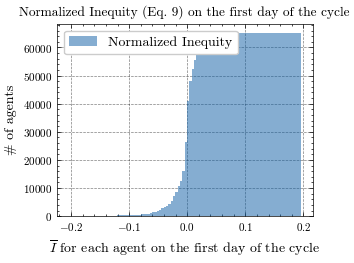

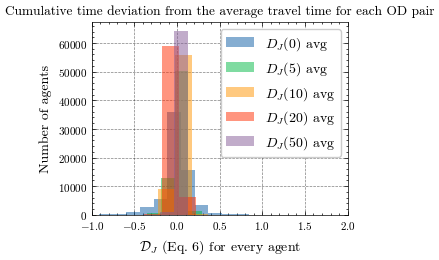

/var/folders/w4/xs9m4t1j28598sp65xft3k1h0000gn/T/ipykernel_50876/1589916023.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('Rafal_val.png', format='png', dpi=600, transparent=True, bbox_inches='tight')


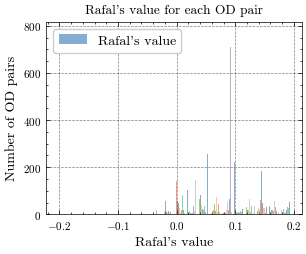

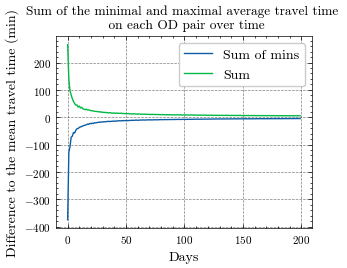

(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,)

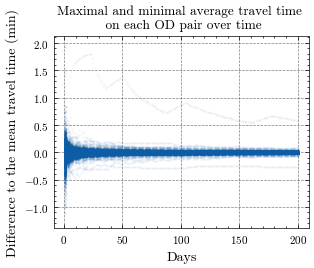

Inequity over time: Barcelona (sum of squares of deviations)
 max: 118.78501375661361 min: 5.0000000000015635e-05 mean: 0.9945667294034074 median: 0.13187902462121337 std: 4.517781701049427 75th percentile: 0.5924198571428521 95th percentile: 3.788122669023428
max: 78.5326285714287 min: 2.0000000000006254e-06 mean: 0.15908676727089027 median: 0.013255366006256247 std: 1.7891574020092136 75th percentile: 0.06902118481012556 95th percentile: 0.4341944652100828
max: 44.61477566137546 min: 5.000000000001564e-07 mean: 0.06729151586044912 median: 0.00327513481767168 std: 1.003990425717467 75th percentile: 0.019401371502209244 95th percentile: 0.16761693446808598
max: 90.73323180952362 min: 1.250000000000391e-07 mean: 0.0636651252263317 median: 0.0009641743970315426 std: 1.9924769072902095 75th percentile: 0.005808000000000028 95th percentile: 0.06249807500000005
max: 74.06498953142835 min: 2.0000000000006254e-08 mean: 0.041998326068614235 median: 0.00015487999999999966 std: 1.624748572969122

In [ ]:
# for every agent, plot the pdf of D_J for J in [5,10,20,50]
from dijkstra_routes import calculate_routes, read_input, unify_same_time_paths


pairs_SO = []
read_input(f'./assignments/{assignment_file}', pairs_SO)
pairs_SO = calculate_routes(pairs_SO)
pairs_SO = unify_same_time_paths(pairs_SO)
od_df = {}
additional_plot = []
for pair in pairs_SO:
    od_str = str(pair.origin) + " -> " + str(pair.destination)
    if od_str not in df["OD"].values:
        continue
    history = df[df["OD"] == od_str]["history"]
    # print("OD pair: ", od_str)
    if history.empty:
        continue
    his = history.values[0]
    day_0 = his[0]
    # print(len(his), " days of history for OD pair: ", od_str, " with ", len(pair.routes), " routes", " and ", len(his[0]), " agents")
    avg_time = np.mean([pair.routes[i].time for i in day_0]) # avg time of this OD pair
    # print("Average time: ", avg_time)
    D_J = []
    pair_times = np.zeros((len(his), len(his[0]))) # matrix of times for each agent on each day
    for day in range(len(his)):
        assignment = his[day]
        daily_deviation = np.zeros(len(assignment))
        daily_deviation_norm = np.zeros(len(assignment))
        for i, agent_route in enumerate(assignment):
            if agent_route < 0:
                continue
            route = pair.routes[agent_route]
            pair_times[day][i] = pair_times[day-1][i] + route.time if day > 0 else route.time
            daily_deviation[i] = D_J[-1][i] if D_J else 0 
            daily_deviation[i] += route.time - avg_time
            daily_deviation_norm[i] = daily_deviation[i] / avg_time if avg_time != 0 else 0
            if day == 0:
                additional_plot.append((route.time - avg_time) / avg_time)
        D_J.append(daily_deviation)

        
    #change D_J to be a prefix sum array
    
    
    D_J = [D_J[i] + (D_J[i-1] if i > 0 else 0) for i in range(len(D_J))]
    divs = np.arange(1, pair_times.shape[0] + 1).reshape(-1, 1)  # create an array of divisors for each day
    avg_times = pair_times / divs  # divide each day's times by the corresponding divisor
    od_df[od_str] = {
        "Normalized_0th": D_J[0]/avg_time,
        "D_J_0_avg": D_J[0],
        "D_J_5_avg": [D_J[4][i]/5 for i in range(len(D_J[4]))],
        "D_J_10_avg": [D_J[9][i]/10 for i in range(len(D_J[9]))],
        "D_J_20_avg": [D_J[19][i]/20 for i in range(len(D_J[19]))],
        "D_J_50_avg": [D_J[49][i]/50 for i in range(len(D_J[49]))],
        "sum_times": pair_times,
        "avg_times": avg_times,
    }
plt.figure()
plt.hist(additional_plot, bins=100, alpha=0.5, label="Normalized Inequity", cumulative=True)
plt.xlabel("$\overline{I}$ for each agent on the first day of the cycle")
plt.ylabel("# of agents")
plt.title("Normalized Inequity (Eq. 9) on the first day of the cycle")
plt.legend()
#increase the dpi
plt.savefig('Normalized_0th_cdf.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
plt.show()
# plot the D_J for each OD pair
dj_0_all = []
dj_5_all = []
dj_10_all = []
dj_20_all = []
dj_50_all = []
normalized_0th_all = []
avg_times = np.array([])
for od_str, values in od_df.items():
    dj_0_all.append(values["D_J_0_avg"])
    dj_5_all.append(values["D_J_5_avg"])
    dj_10_all.append(values["D_J_10_avg"])
    dj_20_all.append(values["D_J_20_avg"])
    dj_50_all.append(values["D_J_50_avg"])
    normalized_0th_all.append(values["Normalized_0th"])
    avg_times = np.append(avg_times, np.mean(values["avg_times"], axis=1)[0])  # average times for each OD pair over time
    #flatten the lists
dj_0_all_flattened = [item for sublist in dj_0_all for item in sublist]
dj_5_all_flattened = [item for sublist in dj_5_all for item in sublist]
dj_10_all_flattened = [item for sublist in dj_10_all for item in sublist]
dj_20_all_flattened = [item for sublist in dj_20_all for item in sublist]
dj_50_all_flattened = [item for sublist in dj_50_all for item in sublist]
ineq_0 = np.array([sum([x**2 for x in sublist]) for sublist in dj_0_all])
ineq_5 = np.array([sum([x**2 for x in sublist]) for sublist in dj_5_all])
ineq_10 = np.array([sum([x**2 for x in sublist]) for sublist in dj_10_all])
ineq_20 = np.array([sum([x**2 for x in sublist]) for sublist in dj_20_all])
ineq_50 = np.array([sum([x**2 for x in sublist]) for sublist in dj_50_all])
ineq_0_norm = ineq_0 / avg_times
ineq_5_norm = ineq_5 / avg_times
ineq_10_norm = ineq_10 / avg_times
ineq_20_norm = ineq_20 / avg_times
ineq_50_norm = ineq_50 / avg_times
plt.figure()
plt.hist(dj_0_all_flattened, bins=20, alpha=0.5, label="$D_J(0)$ avg")
plt.hist(dj_5_all_flattened, bins=20, alpha=0.5, label="$D_J(5)$ avg")
plt.hist(dj_10_all_flattened, bins=20, alpha=0.5, label="$D_J(10)$ avg")
plt.hist(dj_20_all_flattened, bins=20, alpha=0.5, label="$D_J(20)$ avg")
plt.hist(dj_50_all_flattened, bins=20, alpha=0.5, label="$D_J(50)$ avg")
plt.xlabel("$\mathcal{D}_J$ (Eq. 6) for every agent")
# fix the x axis to be from -1 to +2
plt.xlim(-1, 2)
plt.ylabel("Number of agents")
plt.title("Cumulative time deviation from the average travel time for each OD pair")
plt.legend()
#increase the dpi
plt.savefig('D_J_avg.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
plt.show()

plt.figure()
plt.hist(normalized_0th_all, bins=20, alpha=0.5, label="Normalized first day time
", cumulative=True)
plt.xlabel("Normalized first day time
")
plt.ylabel("Number of OD pairs")
plt.title("Normalized first day time
 for each OD pair")
plt.legend()
#increase the dpi
plt.savefig('Normalized_0th.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
plt.show()
# plot the D_J for each OD pair

# plot the avg times for each OD pair over time
plt.figure()
cntr = 0
mins_all = np.zeros(200)
maxes_all = np.zeros(200)
for i, (od_str, values) in enumerate(od_df.items()):
    mins = [np.min(values["avg_times"][day]) for day in range(len(values["avg_times"]))]
    maxes = [np.max(values["avg_times"][day]) for day in range(len(values["avg_times"]))]
    avg = np.mean(values["avg_times"], axis=1)
    # print(len(mins), len(maxes))
    # if df[df["OD"] == od_str]["convergence"].values[0] == -1:
        # plt.plot(mins-avg)
        # plt.plot(maxes-avg)
    cntr += 1
    # print(mins[0], maxes[0], avg[0])
    mins_all += mins - avg
    maxes_all += maxes - avg

plt.plot(mins_all, label="Sum of mins")
plt.plot(maxes_all, label="Sum")
# print(mins_all, maxes_all)
plt.xlabel("Days")
plt.title("Sum of the minimal and maximal average travel time \n on each OD pair over time")
plt.legend()
plt.ylabel("Difference to the mean travel time (min)")
# save with higher dpi
plt.savefig('cumulative_times_non_converging.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
plt.show()


all_pairs = []
for i, (od_str, values) in enumerate(od_df.items()):
    vals = np.array([values["avg_times"][day] for day in range(len(values["avg_times"]))])
   
    avg = np.mean(values["avg_times"], axis=1)
    adjusted = vals - avg[:, np.newaxis]  # Adjust each day's times by subtracting the average for that day
    mins = np.min(adjusted, axis=1)
    maxes = np.max(adjusted, axis=1)
    print(mins.shape, maxes.shape)
    # if df[df["OD"] == od_str]["convergence"].values[0] == -1:
    for idx in range(200):
        all_pairs.append((idx+1, mins[idx]))
        all_pairs.append((idx+1, maxes[idx]))
all_pairs = np.array(all_pairs)

plt.scatter(all_pairs[:, 0], all_pairs[:, 1], s=0.5, alpha=0.04)
# print(mins_all, maxes_all)
plt.xlabel("Days")
plt.title("Maximal and minimal average travel time \n on each OD pair over time")
plt.ylabel("Difference to the mean travel time (min)")
# save with higher dpi
plt.savefig('cumulative_times_non_converging.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
plt.show()


print("Inequity over time: Barcelona (sum of squares of deviations)")
print(" max:" , np.max(ineq_0), "min:", np.min(ineq_0), "mean:", np.mean(ineq_0), "median:", np.median(ineq_0), "std:", np.std(ineq_0), "75th percentile:", np.percentile(ineq_0, 75), "95th percentile:", np.percentile(ineq_0, 95))
print("max:" , np.max(ineq_5), "min:", np.min(ineq_5), "mean:", np.mean(ineq_5), "median:", np.median(ineq_5), "std:", np.std(ineq_5), "75th percentile:", np.percentile(ineq_5, 75), "95th percentile:", np.percentile(ineq_5, 95))
print("max:" , np.max(ineq_10), "min:", np.min(ineq_10), "mean:", np.mean(ineq_10), "median:", np.median(ineq_10), "std:", np.std(ineq_10), "75th percentile:", np.percentile(ineq_10, 75), "95th percentile:", np.percentile(ineq_10, 95))
print( "max:" , np.max(ineq_20), "min:", np.min(ineq_20), "mean:", np.mean(ineq_20), "median:", np.median(ineq_20), "std:", np.std(ineq_20), "75th percentile:", np.percentile(ineq_20, 75), "95th percentile:", np.percentile(ineq_20, 95))
print( "max:" , np.max(ineq_50), "min:", np.min(ineq_50), "mean:", np.mean(ineq_50), "median:", np.median(ineq_50), "std:", np.std(ineq_50), "75th percentile:", np.percentile(ineq_50, 75), "95th percentile:", np.percentile(ineq_50, 95))

print("Inequity over time: Barcelona (sum of squares of deviations)")
print(" max:" , np.max(ineq_0_norm), "min:", np.min(ineq_0_norm), "mean:", np.mean(ineq_0_norm), "median:", np.median(ineq_0_norm), "std:", np.std(ineq_0_norm), "75th percentile:", np.percentile(ineq_0_norm, 75), "95th percentile:", np.percentile(ineq_0_norm, 95))
print("max:" , np.max(ineq_5_norm), "min:", np.min(ineq_5_norm), "mean:", np.mean(ineq_5_norm), "median:", np.median(ineq_5_norm), "std:", np.std(ineq_5_norm), "75th percentile:", np.percentile(ineq_5_norm, 75), "95th percentile:", np.percentile(ineq_5_norm, 95))
print("max:" , np.max(ineq_10_norm), "min:", np.min(ineq_10_norm), "mean:", np.mean(ineq_10_norm), "median:", np.median(ineq_10_norm), "std:", np.std(ineq_10_norm), "75th percentile:", np.percentile(ineq_10_norm, 75), "95th percentile:", np.percentile(ineq_10_norm, 95))
print( "max:" , np.max(ineq_20_norm), "min:", np.min(ineq_20_norm), "mean:", np.mean(ineq_20_norm), "median:", np.median(ineq_20_norm), "std:", np.std(ineq_20_norm), "75th percentile:", np.percentile(ineq_20_norm, 75), "95th percentile:", np.percentile(ineq_20_norm, 95))
print( "max:" , np.max(ineq_50_norm), "min:", np.min(ineq_50_norm), "mean:", np.mean(ineq_50_norm), "median:", np.median(ineq_50_norm), "std:", np.std(ineq_50_norm), "75th percentile:", np.percentile(ineq_50_norm, 75), "95th percentile:", np.percentile(ineq_50_norm, 95))

In [ ]:
# plot of convergence of average travel time for all agents

pairs_SO = []
read_input(f'./assignments/{assignment_file}', pairs_SO)
pairs_SO = calculate_routes(pairs_SO)
# filter out those that have less than 2 routes
pairs_SO = [pair for pair in pairs_SO if len(pair.routes) > 1]
pairs_SO = unify_same_time_paths(pairs_SO)
od_df = {}
for pair in pairs_SO:
    od_str = str(pair.origin) + " -> " + str(pair.destination)
    if od_str not in df["OD"].values:
        continue
    history = df[df["OD"] == od_str]["history"]
    # print("OD pair: ", od_str)
    if history.empty:
        continue
    his = history.values[0]
    day_0 = his[0]
    # print(len(his), " days of history for OD pair: ", od_str, " with ", len(pair.routes), " routes", " and ", len(his[0]), " agents")
    avg_time = np.mean([pair.routes[i].time for i in day_0]) # avg time of this OD pair
    # print("Average time: ", avg_time)
    D_J = []
    pair_times = np.zeros((len(his), len(his[0]))) # matrix of times for each agent on each day
    for day in range(len(his)):
        assignment = his[day]
        daily_deviation = np.zeros(len(assignment))
        daily_deviation_norm = np.zeros(len(assignment))
        for i, agent_route in enumerate(assignment):
            if agent_route < 0:
                continue
            route = pair.routes[agent_route]
            pair_times[day][i] = pair_times[day-1][i] + route.time if day > 0 else route.time
            daily_deviation[i] = D_J[-1][i] if D_J else 0 
            daily_deviation[i] += route.time - avg_time
            daily_deviation_norm[i] = daily_deviation[i] / avg_time if avg_time != 0 else 0
            if day == 0:
                additional_plot.append((route.time - avg_time) / avg_time)
        D_J.append(daily_deviation)

        
    #change D_J to be a prefix sum array
    
    
    D_J = [D_J[i] + (D_J[i-1] if i > 0 else 0) for i in range(len(D_J))]
    divs = np.arange(1, pair_times.shape[0] + 1).reshape(-1, 1)  # create an array of divisors for each day
    avg_times = pair_times / divs  # divide each day's times by the corresponding divisor
    # print(avg_times.shape, pair_times.shape, D_J[0].shape)
    od_df[od_str] = {
        "Normalized first day time": D_J[0]/avg_time,
        "D_J_0_avg": D_J[0],
        "D_J_5_avg": [D_J[4][i]/5 for i in range(len(D_J[4]))],
        "D_J_10_avg": [D_J[9][i]/10 for i in range(len(D_J[9]))],
        "D_J_20_avg": [D_J[19][i]/20 for i in range(len(D_J[19]))],
        "D_J_50_avg": [D_J[49][i]/50 for i in range(len(D_J[49]))],
        "sum_times": pair_times,
        "avg_times": avg_times,
    }


7922  pairs SO


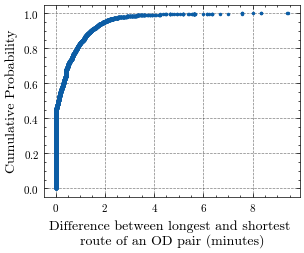

In [35]:
# distribution of the difference between the longest and the shortest route for each OD pair

longest_shortest_diff = []
print(len(pairs_SO), " pairs SO")
for pair in pairs_SO:
    diff = max(route.time for route in pair.routes) - min(route.time for route in pair.routes)
    longest_shortest_diff.append(diff)
plt.figure()
#change it to cdf
sorted = np.sort(longest_shortest_diff)
cdf = np.arange(1, len(sorted) + 1) / len(sorted)
plt.plot(sorted, cdf, marker=".", linestyle="none")
plt.xlabel("Difference between longest and shortest \nroute of an OD pair (minutes)")
plt.ylabel("Cumulative Probability")
# plt.title("CDF of Difference between longest and shortest route for each OD pair")
plt.savefig('longest_shortest_diff_cdf.png', format='png', dpi=600, transparent=True, bbox_inches='tight')

[2.2222222222221275e-05, 2.2222222222221275e-05, 3.1554436208840472e-30, 2.2222222222221275e-05, 2.2222222222221275e-05, 1.262177448353619e-29, 2.2222222222221275e-05, 2.2222222222221275e-05, 2.8398992587956425e-29, 2.2222222222221275e-05, 2.2222222222221275e-05, 5.048709793414476e-29, 2.2222222222221275e-05, 2.2222222222221275e-05, 7.888609052210118e-29, 2.2222222222221275e-05, 2.2222222222221275e-05, 1.135959703518257e-28, 2.2222222222221275e-05, 2.2222222222221275e-05, 1.5461673742331831e-28, 2.2222222222221275e-05, 2.2222222222221275e-05, 2.0194839173657902e-28, 2.2222222222221275e-05, 2.2222222222221275e-05, 2.5559093329160782e-28, 2.2222222222221275e-05, 2.2222222222221275e-05, 3.155443620884047e-28, 2.2222222222221275e-05, 2.2222222222221275e-05, 3.818086781269697e-28, 2.2222222222221275e-05, 2.2222222222221275e-05, 4.543838814073028e-28, 2.2222222222221275e-05, 2.2222222222221275e-05, 5.33269971929404e-28, 2.2222222222221275e-05, 2.2222222222221275e-05, 6.184669496932733e-28, 2

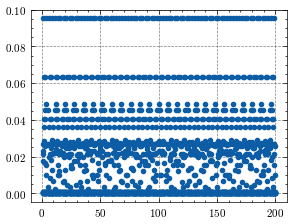

In [33]:
pairs_SO = []
read_input(f'./assignments/{assignment_file}', pairs_SO)
pairs_SO = calculate_routes(pairs_SO)
pairs_SO = unify_same_time_paths(pairs_SO)
od_df = {}
for pair in pairs_SO:
    od_str = str(pair.origin) + " -> " + str(pair.destination)
    if od_str not in df["OD"].values:
        continue
    if df[df["OD"] == od_str]["convergence"].values[0] == -1:
        continue
    history = df[df["OD"] == od_str]["history"]
    # print("OD pair: ", od_str)
    if history.empty:
        continue
    his = history.values[0]
    day_0 = his[0]
    avg_time = np.mean([pair.routes[i].time for i in day_0]) # avg time of this OD pair
    D_J = []
    I_J = []
    I_J_norm = []
    pair_times = np.zeros((len(his), len(his[0]))) # matrix of times for each agent on each day
    for day in range(len(his)):
        assignment = his[day]
        daily_deviation = np.zeros(len(assignment))
        daily_deviation_norm = np.zeros(len(assignment))
        for i, agent_route in enumerate(assignment):
            if agent_route < 0:
                continue
            route = pair.routes[agent_route]
            pair_times[day][i] = pair_times[day-1][i] + route.time if day > 0 else route.time
            daily_deviation[i] = D_J[-1][i] if D_J else 0 
            daily_deviation[i] += route.time - avg_time
        daily_inequity = np.sum(daily_deviation**2)/ len(daily_deviation) if len(daily_deviation) > 0 else 0
        daily_inequity_norm = daily_inequity / (avg_time) if avg_time != 0 else 0
            
        D_J.append(daily_deviation)
        I_J.append(daily_inequity)
        I_J_norm.append(daily_inequity_norm)
    # print("OD pair: ", od_str, " with ", len(pair.routes), " routes", " and ", len(his[0]), " agents")
    # print("Average time: ", avg_time)
    # print("D_J: ", D_J[-1])
    # print("I_J: ", I_J[-1])
    # print("I_J_norm: ", I_J_norm[-1])
    od_df[od_str] = {
        "D_J": D_J,
        "I_J": I_J,
        "I_J_norm": I_J_norm,
        "pair_times": pair_times,
        "avg_times": np.mean(pair_times, axis=1) if pair_times.size > 0 else np.zeros(pair_times.shape[0]),
    }

# plot the I_J and I_J_norm for each OD pair over time (x axis is days)
plt.figure()
I_J_all = []
I_J_norm_all = []
cntr = 0
for od_str, values in od_df.items():
    # pairs idx-value for I_J and I_J_norm
    cntr += 1
    for idx, val in enumerate(values["I_J"]):
        I_J_all.append((idx+1, val))

    for idx, val in enumerate(values["I_J_norm"]):
        I_J_norm_all.append((idx+1, val))
    print(values["I_J"])
    print(values["I_J_norm"])
    if cntr > 10:
        break
plt.scatter(*zip(*I_J_all), label="I_J (sum of squares of deviations)")